In [49]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from matplotlib import gridspec
import numpy as np
from slab import SlabOut
import plot_chem
reload(plot_chem)
import cooling_utils as cu
reload(cu)
from matplotlib.colors import LogNorm
import const
import shielding

In [3]:
G0 = 1.
xi_CR = 1.0e-16
Zd = 1. 

In [6]:
dir_out = "/Users/munangong/chemistry_Athena/PDR_cvode/"

In [7]:
slab = SlabOut(dir_out+"out_sn/") 
slab.ReadRates()
slab.ReadThermo()

Set xC=1.60e-04, xO=3.20e-04.
Calculating E assuming CvCold and xHe=0.1 ...


In [51]:
H2_cr = np.zeros(slab.nHM.shape)
H2_cr_FUV = np.zeros(slab.nHM.shape)
NH2 = np.zeros(slab.nHM.shape)
for i in xrange(slab.nHM.shape[1]):
    NH2[:, i] = plot_chem.GetNi(slab.NH, slab.abd["H2"][:, i])
bH2 = 3.0e5
GH2 = G0 * shielding.fH2_dust(slab.NHM) * shielding.fH2_self(NH2, bH2)
for i in xrange(slab.nHM.shape[0]):
    for j in xrange(slab.nHM.shape[1]):
        H2_cr[i, j] = cu.fH2_CR(slab.nHM[i, j], kcr=xi_CR, Zd=Zd)
        H2_cr_FUV[i, j] = cu.fH2_CR_FUV(slab.nHM[i, j], GH2[i, j], kcr=xi_CR, Zd=Zd)

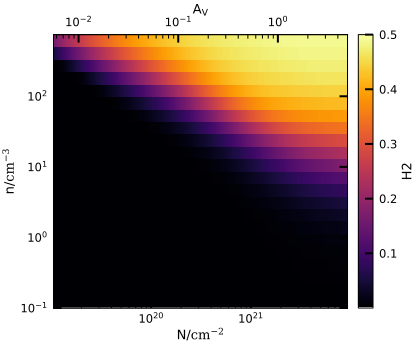

In [10]:
plot_chem.plot_abd(slab, "H2", vmax=0.5)

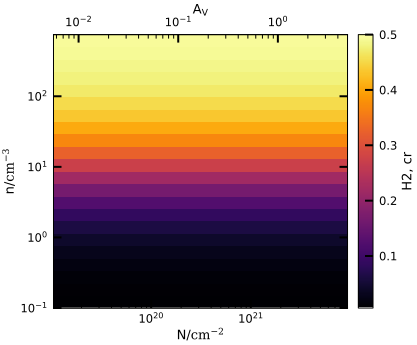

In [11]:
plot_chem.plot_abd(slab, "H2, cr", vmax=0.5, plot_field=H2_cr)

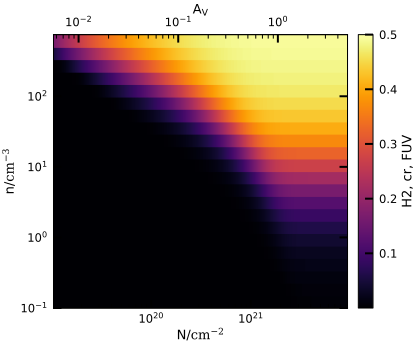

In [52]:
plot_chem.plot_abd(slab, "H2, cr, FUV", vmax=0.5, plot_field=H2_cr_FUV)

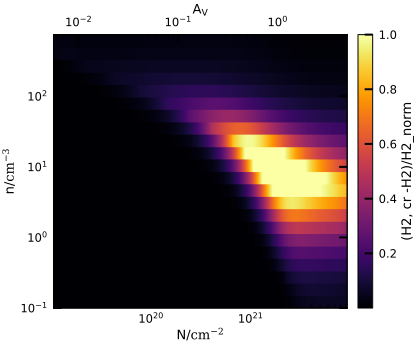

In [54]:
H2_min = 0.1
H2_norm = np.zeros(slab.abd["H2"].shape) + H2_min
indx = slab.abd["H2"] > H2_min
H2_norm[indx] = slab.abd["H2"][indx]
plot_chem.plot_abd(slab, "(H2, cr -H2)/H2_norm", vmax=1, plot_field=(H2_cr_FUV-slab.abd["H2"])/H2_norm)

The calculation of $f_{H_2}$ from CR is probably OK, since most error occurs at high density and low shielding regions, which is rare.

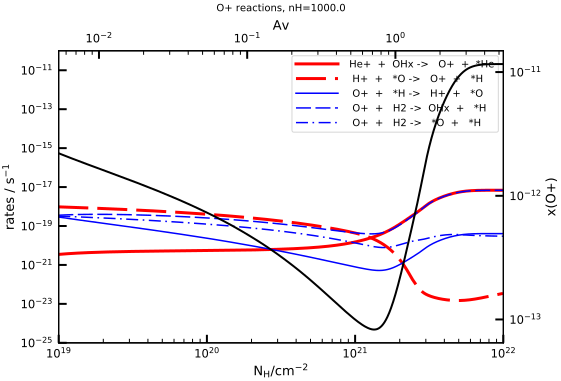

In [63]:
ax = plot_chem.plot_rates_nH(slab, 1000, "O+")

In [119]:
def fH2_eq(f, nH, T, kgr=3.0e-17, kcr=2.0e-16):
    k1 = 6.4e-10
    k2 = 2.84e-9 * T**(0.042) * np.exp(-T/46600.)
    a = 1.4 * kcr * (k2 - k1)
    b = - (2.*nH*kgr*(k2 - 2*k1) + kcr*(3*k2 - 3.7*k1))
    c = nH*kgr*(k2 - 4*k1) - 1.5*kcr*k1
    d = nH*kgr*k1
    eq = a*f**3 + b*f**2 + c*f + d
    delta0 = b*b-3*a*c
    delta1 = 2*b*b*b -9*a*b*c + 27*a*a*d
    t1 = delta1**2 - 4*delta0**3
    C = -(abs(delta1)/2)**(1./3.)
    return eq

0.282970740622


(-1e-24, 1e-24)

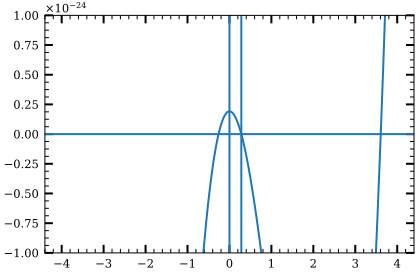

In [120]:
fsolve = cu.fH2_CR_new(10, 20)
print fsolve
x = np.linspace(-4, 4, 1000)
eq = fH2_eq(x, 10, 20.)
plt.plot(x, eq)
plt.axhline(y=0)
plt.axvline(x=0)
plt.axvline(x=fsolve)
plt.ylim([-1e-24, 1e-24])

In [154]:
nH_arr = np.logspace(1, 4, 100)
fH2_nH = cu.fH2_CR(nH_arr, kcr=1e-18)
fH2_nH_new = np.array([cu.fH2_CR_new(ni, 20., kcr=1e-18) for ni in nH_arr])

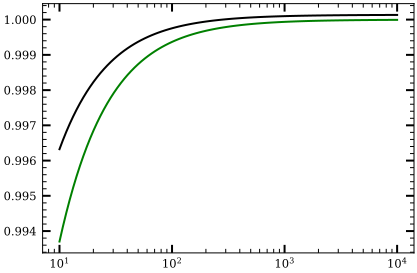

In [155]:
plt.plot(nH_arr, fH2_nH*2, "g-")
plt.plot(nH_arr, fH2_nH_new*2, "k-")
plt.xscale("log")

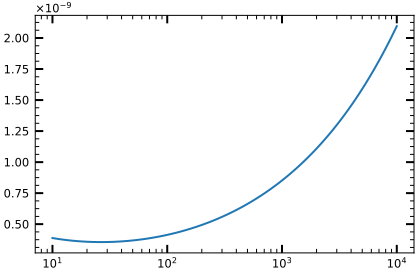

In [65]:
x = np.logspace(1, 4, 100)
plt.plot(x, 5e-11*x**0.405+7.5e-10*x**(-0.458))
plt.xscale("log")